# Figure2 - TCR

In [1]:
suppressPackageStartupMessages({
    library(Seurat)
    library(dplyr)
    library(data.table)
    library(ggplot2)
    library(patchwork)
    library(pheatmap)
    library(scRepertoire)
    library(tidyr)
    library(ggrastr)
    library(glue)

})

source("myfun.r")
source("utils.r")

In [2]:
treg.path <-"/data/brennerlab/Shani/projects/Treg/analysis/integrated/integrated.Tregs.rds"
tcr.path <- "/data/brennerlab/Shani/projects/Treg/analysis/integrated/TCR_RNA_combined.Tregs.rds"
saving.path <- "/data/brennerlab/Shani/projects/Treg/analysis/integrated/"

In [3]:
tcr <- readRDS(tcr.path)

In [4]:
tcr.clone.info <- subset(tcr, cells = colnames(tcr)[tcr$cloneSize > 0])
tcr.clone.info

An object of class Seurat 
38406 features across 11443 samples within 3 assays 
Active assay: RNA (38224 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: ADT, HTO
 3 dimensional reductions calculated: pca, harmony, humap

In [5]:
cell.states.renaming <- as.character(tcr.clone.info$cell.states)
cell.states.renaming[cell.states.renaming == "CD25high Treg"] <- "CD25hiCXCR6neg Treg"
cell.states.renaming[cell.states.renaming == "CD25highCXCR6+ Treg"] <- "CD25hiCXCR6pos Treg"
cell.states.renaming[cell.states.renaming == "AREG+ Treg"] <- "CD25loAREGpos Treg"
cell.states.renaming[cell.states.renaming == "TNFAIP3+ Treg"] <- "CD25hiTNFAIP3pos Treg"
cell.states.renaming[cell.states.renaming == "CD161+mem. Treg"] <- "CD161posmem. Treg"

tcr.clone.info <- AddMetaData(tcr.clone.info, cell.states.renaming, "cell.states")

ordered.levels = c("Naive Treg",
                   "CD25int Treg",
                   "CD25hiCXCR6neg Treg",
                   "CD25hiCXCR6pos Treg",
                   "CD25loAREGpos Treg",
                   "CD25hiTNFAIP3pos Treg",
                   "CD161posmem. Treg",
                   "ISG Treg",
                   "GZM Treg",
                   "Prolif.")
tcr.clone.info$cell.states <- factor(tcr.clone.info$cell.states, levels = ordered.levels)


## Fig2a

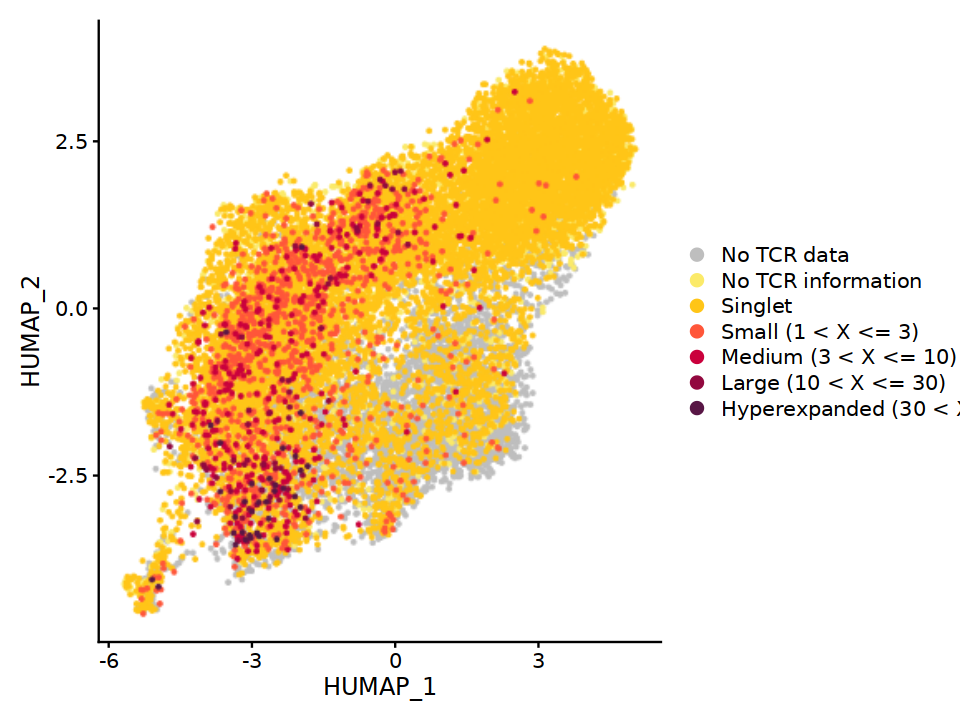

In [10]:
fig.size(6,8)
category.order <- c("Hyperexpanded (30 < X)", "Large (10 < X <= 30)",
                  "Medium (3 < X <= 10)","Small (1 < X <= 3)",
                  "Singlet", "No TCR information", "No TCR data")

f2a <- DimPlot(tcr, pt.size = 0.5, group.by = "cloneCategory", 
        order = category.order) +
        scale_color_manual(values = colors.no.info) +
        ggtitle(NULL)



# pdf(file = paste(saving.path, "Figures/Fig2a.clonalExpansionUMAP.rasterized.pdf", sep = ''),
#     width = 8, 
#     height = 6)

# rasterize(f2a, dpi = 300)
# dev.off()
rasterize(f2a)


pdf 
  2

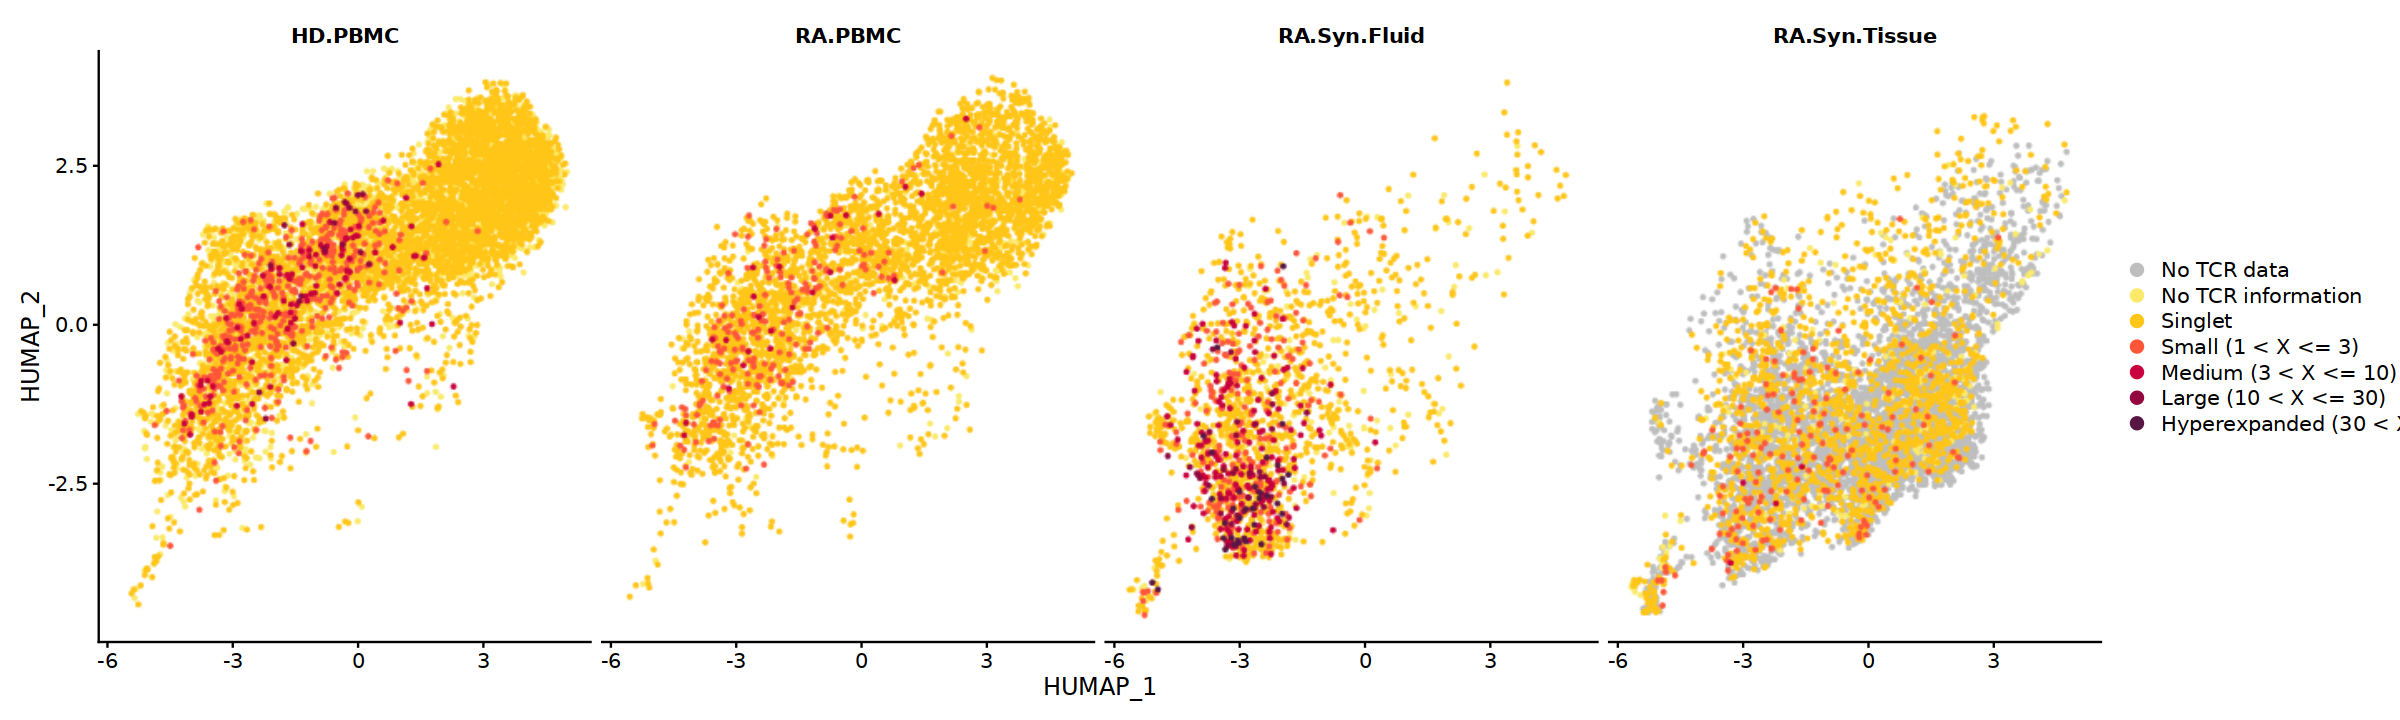

In [11]:
fig.size(6,20)
f2a <- DimPlot(tcr, pt.size = 0.5, group.by = "cloneCategory", 
        split.by = "tissue",
        order = category.order) +
        scale_color_manual(values = colors.no.info) +
        ggtitle(NULL)



pdf(file = paste(saving.path, "Figures/SupFig2a.clonalExpansionUMAP.tissue.rasterized.pdf", sep = ''),
    width = 20, 
    height = 6)

rasterize(f2a, dpi = 300)
dev.off()
rasterize(f2a)


## Fig2b

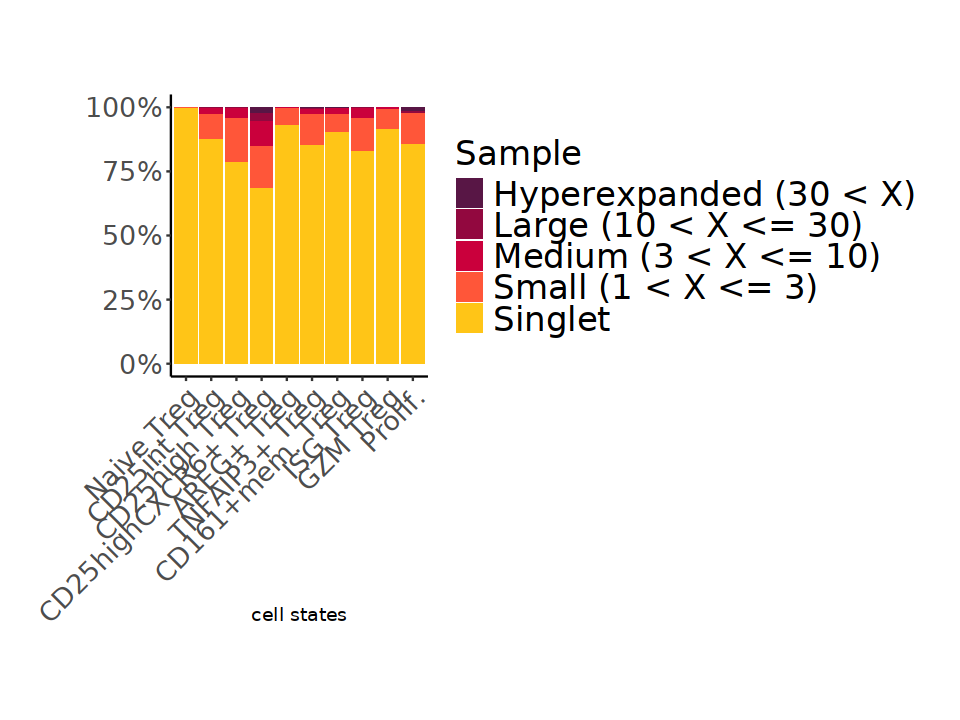

In [14]:
fig.size(6,8)
tcr.clone.info@meta.data  %>%
    group_by(cell.states, cloneCategory, tissue) %>%
    dplyr::count() %>%
    group_by(cell.states) %>%
    mutate(Percent=100*n/sum(n)) %>%
    ungroup() %>%
    ggplot(aes(x=cell.states, y=Percent, fill=cloneCategory)) +
        geom_col() +
        # scale_fill_brewer(palette = "Blues", direction = -1, name = "Clone Type") +
        scale_fill_manual(values = colors.no.info) +
        scale_y_continuous(labels = function(x) paste0(x, "%")) +
        ggtitle(NULL) +
        labs(fill = "Sample") +
        xlab("cell states") + ylab(NULL) +
        theme_classic() + 
        theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
              axis.text.y = element_text(size = 16),
              legend.text = element_text(size=20),
              legend.title = element_text(size = 20),
            plot.margin = margin(t = 2, r = 2, b = 2, l = 2, unit = "cm")) -> f2b
f2b

In [17]:
pdf(file = paste(saving.path, "Figures/Fig2b.clonalExpansion.bar.cluster.pdf", sep = ''),
    width = 8, 
    height = 6)

f2b
dev.off()


pdf 
  2

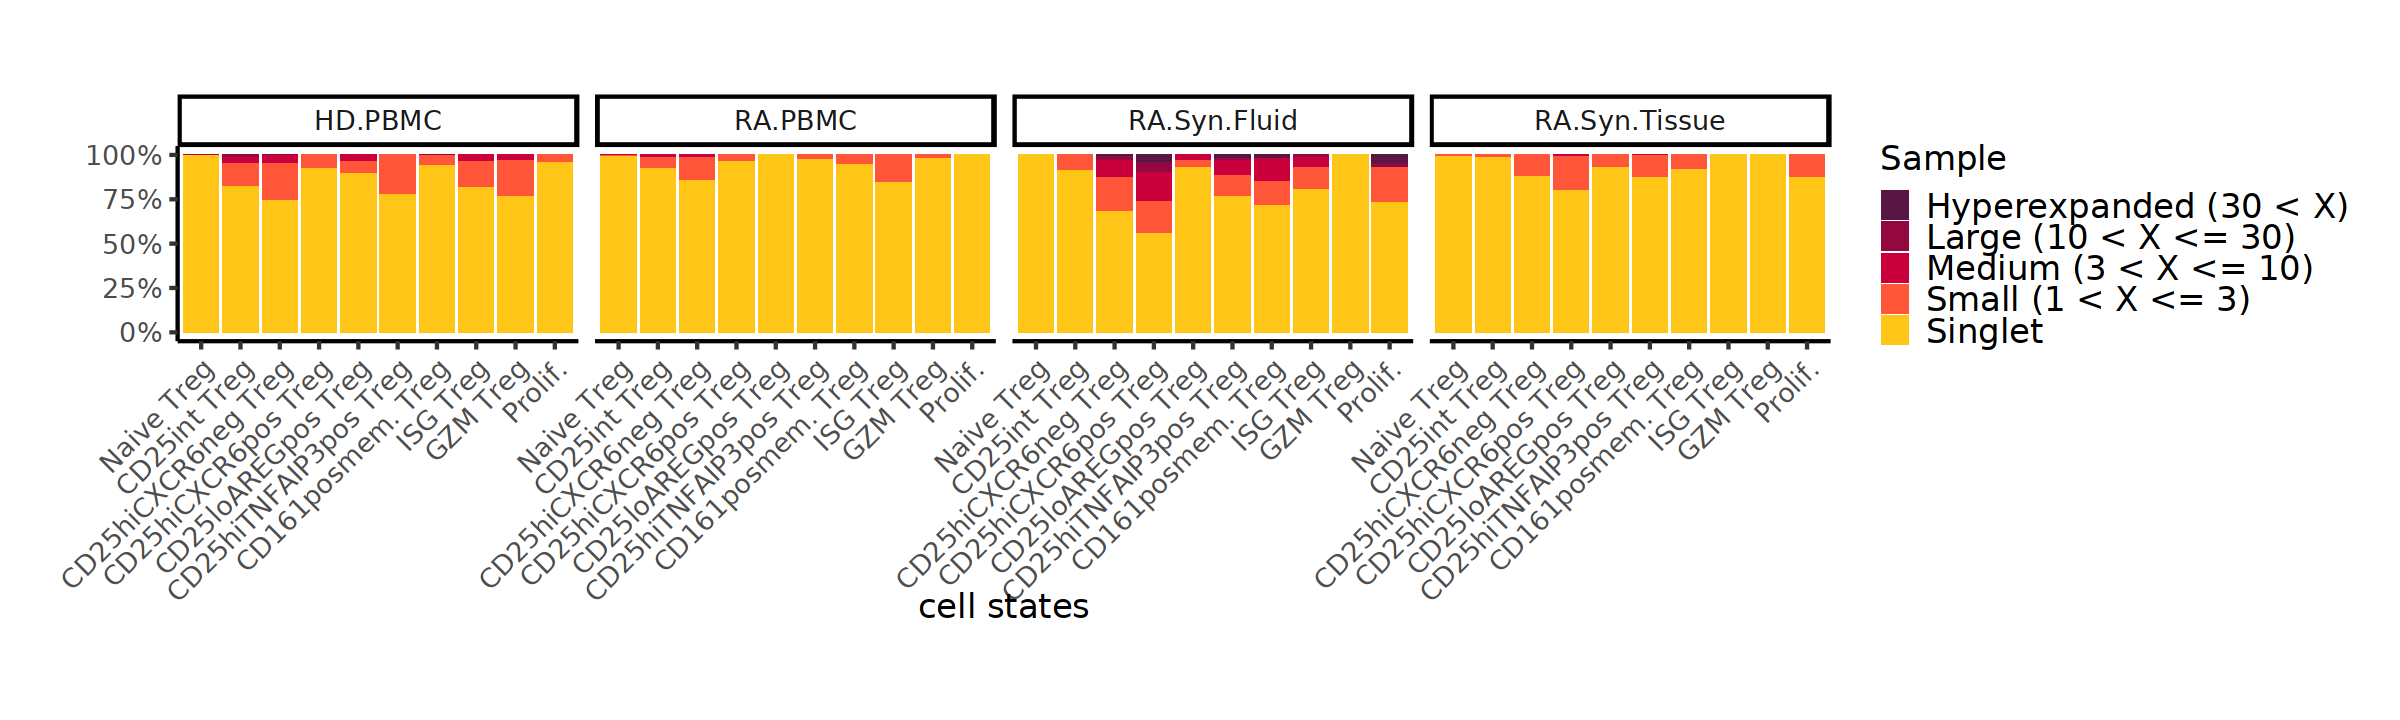

In [35]:
fig.size(6,20)
tcr.clone.info@meta.data  %>%
    group_by(cell.states, cloneCategory, tissue) %>%
    dplyr::count() %>%
    group_by(cell.states, tissue) %>%
    mutate(Percent=100*n/sum(n)) %>%
    ungroup() %>%
    ggplot(aes(x=cell.states, y=Percent, fill=cloneCategory)) +
        geom_col() +
        # scale_fill_brewer(palette = "Blues", direction = -1, name = "Clone Type") +
        scale_fill_manual(values = colors.no.info) +
        scale_y_continuous(labels = function(x) paste0(x, "%")) +
        ggtitle(NULL) +
        labs(fill = "Sample") +
        xlab("cell states") + ylab(NULL) + facet_wrap(~tissue, nrow = 1) +
        theme_classic(base_size = 20) + 
        theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
              axis.text.y = element_text(size = 16),
              legend.text = element_text(size=20),
              legend.title = element_text(size = 20),
            plot.margin = margin(t = 2, r = 2, b = 2, l = 2, unit = "cm")) -> sf2b
sf2b

In [36]:
pdf(file = paste(saving.path, "Figures/SupFig2b.clonalExpansion.bar.cluster.tissue.split.pdf", sep = ''),
    width = 20, 
    height = 6)

sf2b
dev.off()


pdf 
  2

## fig2c

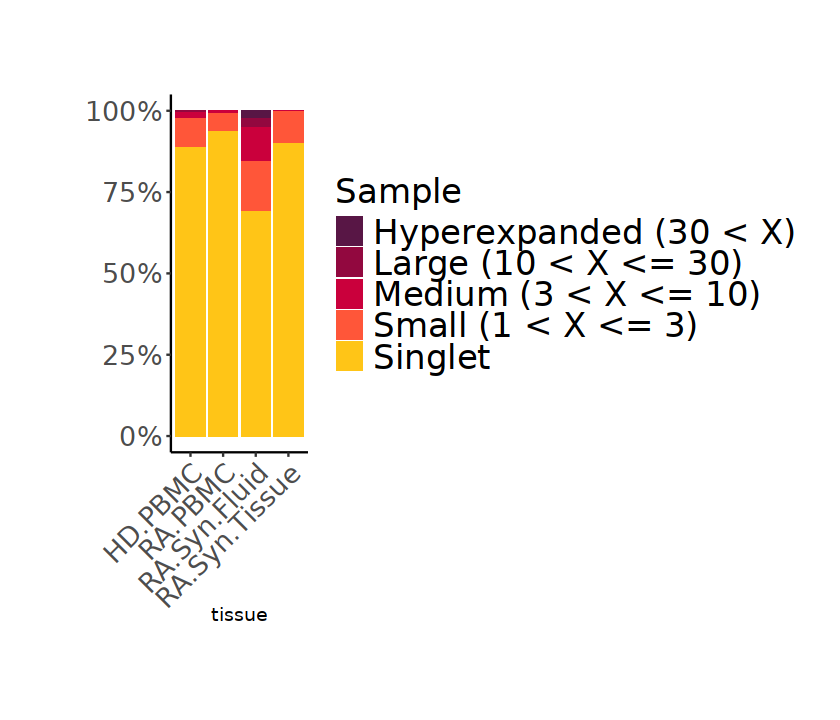

In [18]:
fig.size(6,7)
tcr.clone.info@meta.data  %>%
    group_by(tissue, cloneCategory) %>%
    dplyr::count() %>%
    group_by(tissue) %>%
    mutate(Percent=100*n/sum(n)) %>%
    ungroup() %>%
    ggplot(aes(x=tissue,y=Percent, fill=cloneCategory)) +
        geom_col() +
        # scale_fill_brewer(palette = "Blues", direction = -1, name = "Clone Type") +
        scale_fill_manual(values = colors.no.info) +
        scale_y_continuous(labels = function(x) paste0(x, "%")) +
        ggtitle(NULL) +
        labs(fill = "Sample") +
        xlab("tissue") + ylab(NULL) +
        theme_classic() + 
        theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
              axis.text.y = element_text(size = 16),
              legend.text = element_text(size=20),
              legend.title = element_text(size = 20),
              plot.margin = margin(t = 2, r = 2, b = 2, l = 2, unit = "cm")) -> f2c
f2c

In [19]:
pdf(file = paste(saving.path, "Figures/Fig2c.clonalExpansion.bar.tissue.pdf", sep = ''),
    width = 7, 
    height = 6)

f2c
dev.off()


pdf 
  2

## fig2d

In [6]:
TCR.l <- split(tcr.clone.info@meta.data[!(tcr.clone.info$cell.states %in% c("Prolif.", "CD161+mem. Treg", "ISG Treg", "GZM Treg")),],
               f = tcr.clone.info@meta.data$cell.states[!(tcr.clone.info$cell.states %in% c("Prolif.", "CD161+mem. Treg", "ISG Treg", "GZM Treg"))])

In [29]:
fig.size(6,8)
f2d <- clonalOverlap(
  TCR.l,
  cloneCall = "nt",
  method = "morisita",
  exportTable = FALSE) + theme_bw(base_size = 20) + theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [30]:
f2d$layers[[2]] <- NULL

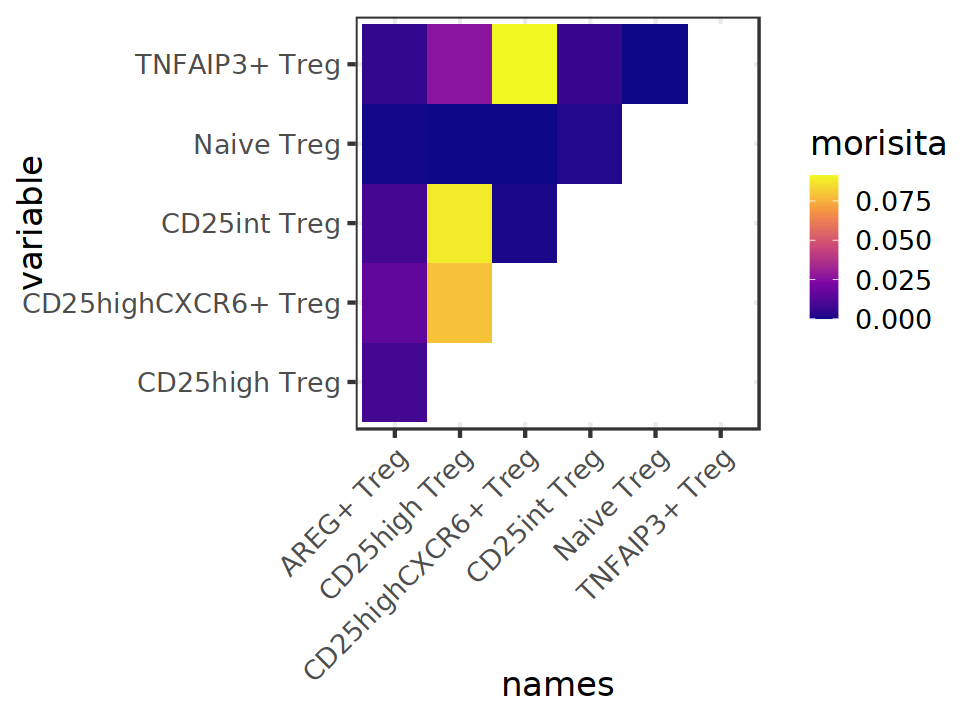

In [31]:
f2d

In [33]:
pdf(file = paste(saving.path, "Figures/Fig2d.morisita.Heatmap.pdf", sep = ''),
    width = 8, 
    height = 6)

f2d
dev.off()


pdf 
  2

In [10]:
TCR.l <- split(tcr.clone.info@meta.data, f = tcr.clone.info@meta.data$cell.states)

Warning message:
“Removed 45 rows containing missing values or values outside the scale range
(`geom_text()`).”


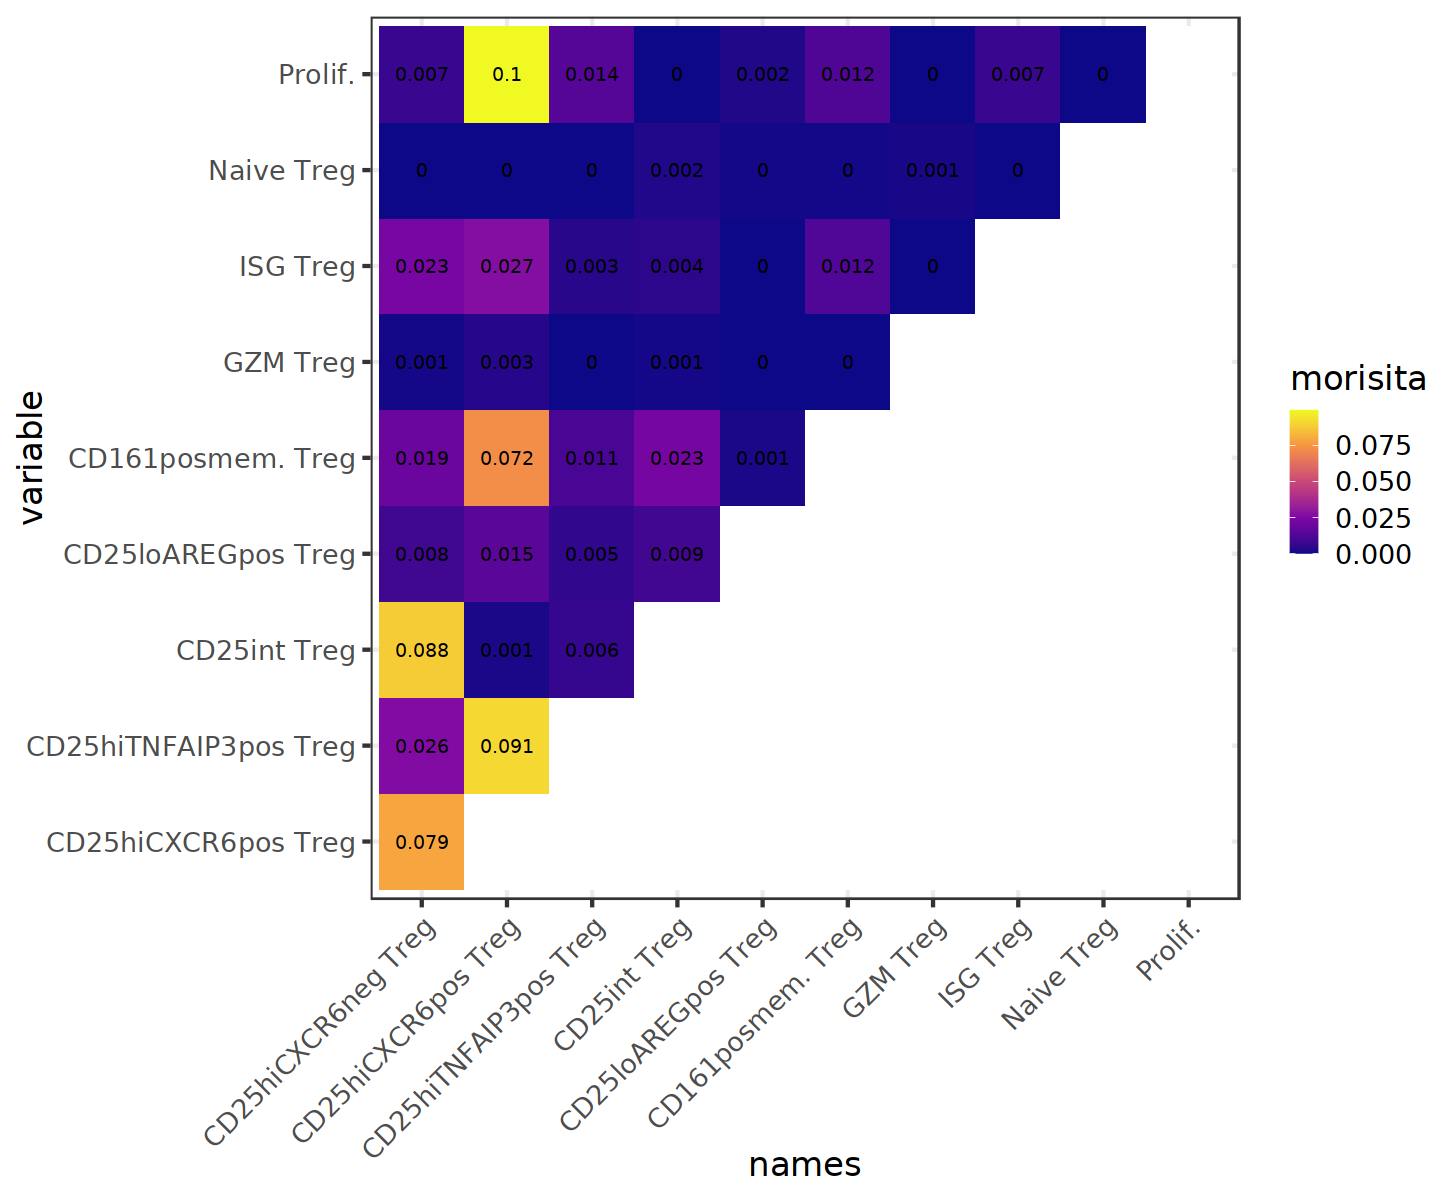

In [14]:
fig.size(10,12)
sf2c <- clonalOverlap(
  TCR.l,
  cloneCall = "nt",
  method = "morisita",
  exportTable = FALSE
) + theme_bw(base_size = 20) + theme(axis.text.x = element_text(angle = 45, hjust = 1))

sf2c

In [15]:
pdf(file = paste(saving.path, "Figures/SupFig2c.morisita.Heatmap.pdf", sep = ''),
    width = 12, 
    height = 10)

sf2c
dev.off()


Warning message:
“Removed 45 rows containing missing values or values outside the scale range
(`geom_text()`).”


pdf 
  2

### Supp Figure 2d

In [17]:
tcr.clone.info$clonal %>% unique()

[1] Not Clonal Clonal    
Levels: Clonal Not Clonal No TCR information No TCR data

In [20]:
fig.size(10, 16)
#getting clones for each cluster
unique.states <- unique(tcr.clone.info$cell.states)
all.states.clones <- list()

Idents(tcr.clone.info) <- "clonal"
only.clonal <- subset(tcr.clone.info,idents = "Clonal") 
for (s in unique.states){
    a <- only.clonal@meta.data %>% filter(cell.states == s) %>% select(CTnt) %>% na.omit() %>% distinct(CTnt)
    all.states.clones[s] = a
    }

#using the upsetR package
# all.states.clones 
sf2d <- UpSetR::upset(UpSetR::fromList(all.states.clones), sets = unique.states, keep.order = F, nintersects = 28,
              mainbar.y.label = "Number of Overlapping Clones", text.scale = c(2.5, 2.5, 2.5, 2.5, 2.5, 2),
              sets.x.label = "Unique Clones in Cluster", order.by = "freq")

In [21]:
pdf(file = paste(saving.path, "Figures/SupFig2d.Shared.clones.pdf", sep = ''),
    width = 16, 
    height = 10)

sf2d
dev.off()


pdf 
  2

## fig2e

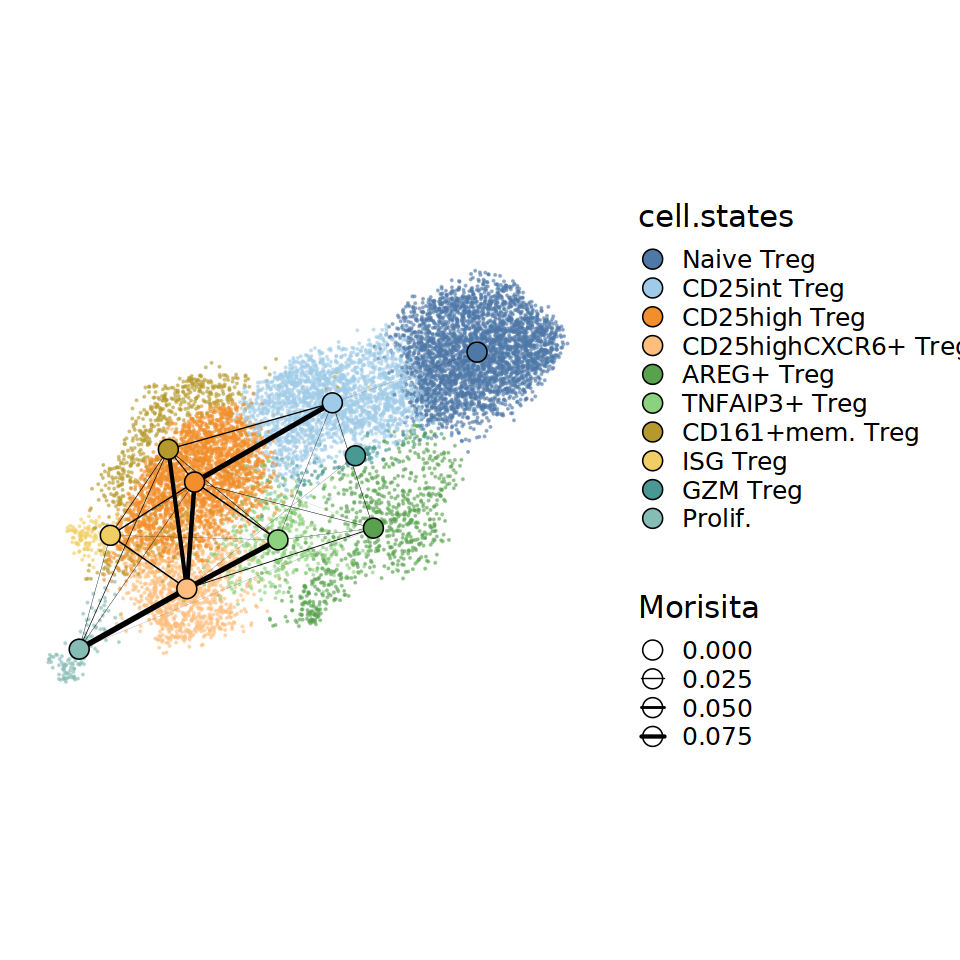

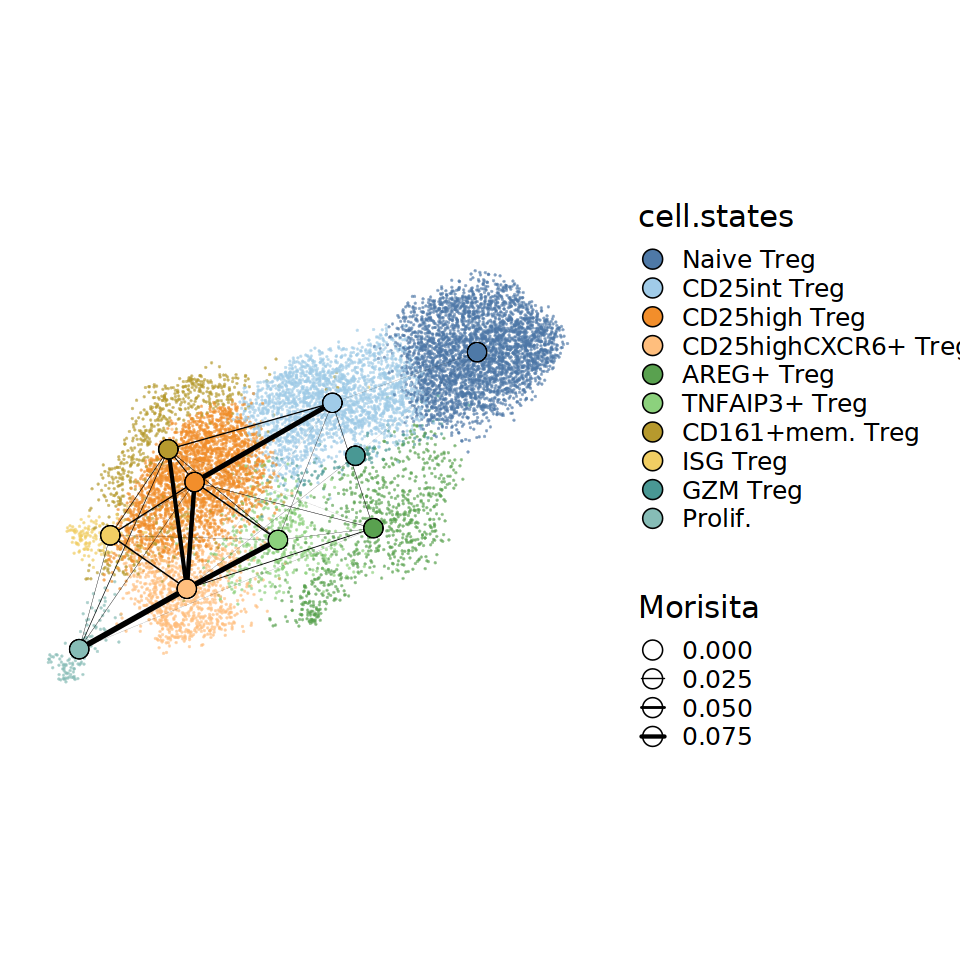

In [41]:
fig.size(8,8)
f2e <- readRDS(paste(saving.path, "Figures/Fig2e.TCR.Trajectory.rds", sep =""))
f2e
rasterize(f2e, dpi=300)

In [42]:
pdf(file = paste(saving.path, "Figures/Fig2e.TCR.Trajectory.pdf", sep = ''),
    width = 8, 
    height = 8)

rasterize(f2e, dpi=300)
dev.off()

pdf 
  2

## fig2f

In [44]:
modules <- list(naive.g <- c("TCF7", "CCR7", "LEF1", "SELL"),
                supp.g <- c("ENTPD1", "ICOS", "TNFRSF9", "IL10", "TNFRSF4", "TGFB1", "TIGIT", "CTLA4", "TNFRSF18", "LAG3", "PDCD1"))


In [48]:
tcr <- AddModuleScore(tcr, modules, name = c("naiveModule", "suppModule"))

In [49]:
tcr$s %>% head

BRI-401_AAACGCTCAATACCCA BRI-401_AAAGGATCACACACGC BRI-401_AACCAACCAGCTCTGG 
             -0.60291980              -0.45012976              -0.23472623 
BRI-401_ACCGTTCTCTCTGCCA BRI-401_AGGATCTCACCCTAGG BRI-401_AGGTAGGGTCGTACTA 
              0.03851691               0.05122792              -0.13273739

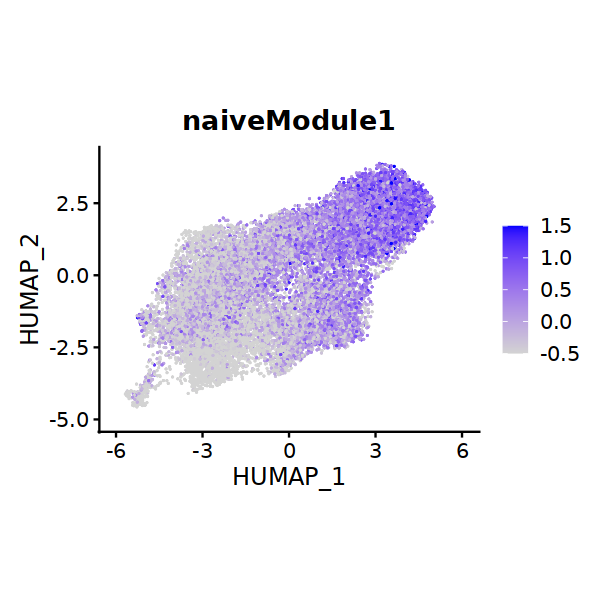

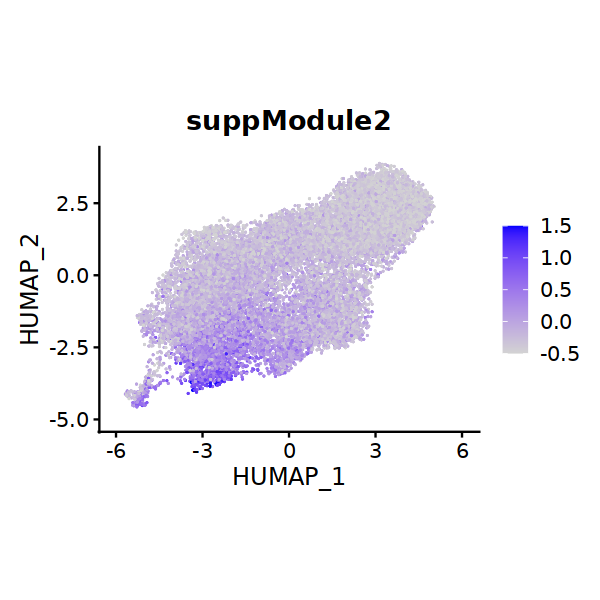

In [61]:
fig.size(5, 5)

feaure.list.to.save <- c("naiveModule1", "suppModule2")

for (g in feaure.list.to.save) {
pdf(file = glue("{saving.path}Figures/Fig2g.ModuleScore.{g}.pdf"),
    width = 5, 
    height = 5)

dp <- FeaturePlot(tcr, g, min.cutoff = -0.5, max.cutoff = 1.5) + coord_fixed() #+ scale_color_continuous(type = "viridis", breaks = c(-1, 0, 1, 1.5))
print(rasterize(dp, dpi = 300))
dev.off()
print(rasterize(dp, dpi = 300))
} 